# OnBalanceVolumeIndicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volume import OnBalanceVolumeIndicator

In [2]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

In [3]:
i = OnBalanceVolumeIndicator(df.close, df.volume)
df["obv"] = i.on_balance_volume()

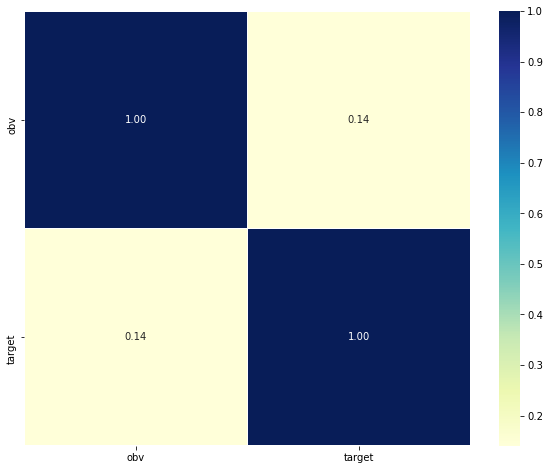

In [4]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

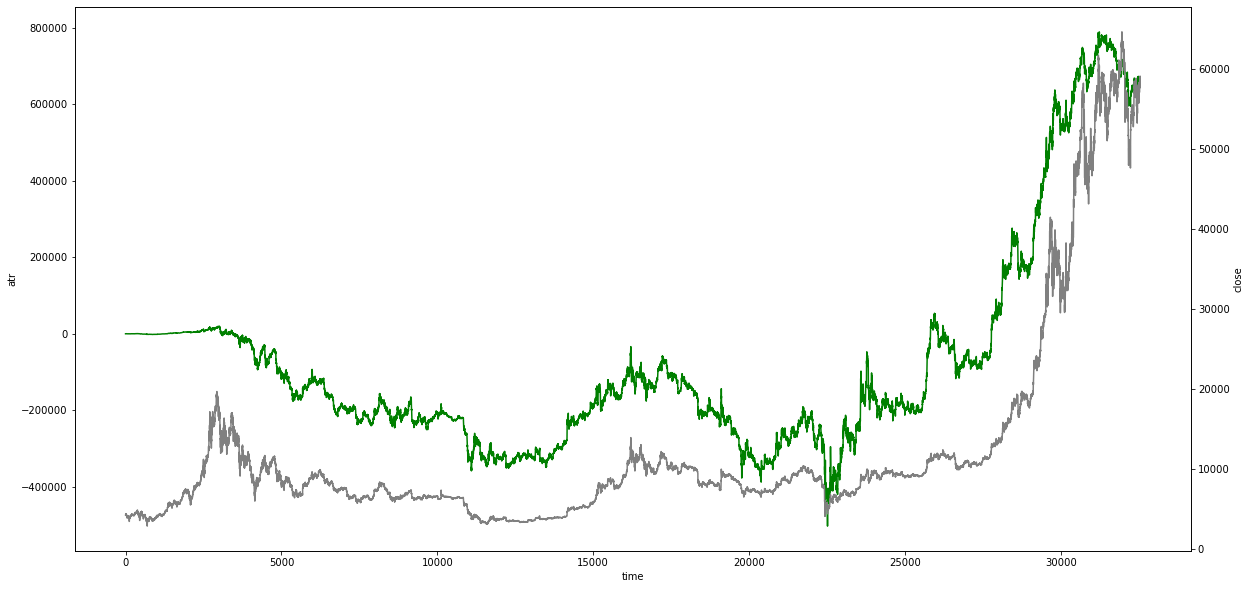

In [6]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.obv,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## OBV over close

In [12]:
df["obv_o_close"] = list(map(lambda n, c: n/c, df.obv, df.close))
df["obv_o_close_rate_20"] = uf.get_rate(uf.get_moving_average(df.obv_o_close, 100))
df["obv_o_close_rate_20_amplified"] = list(map(lambda x: uf.log_abs(x*100), df.obv_o_close_rate_20))


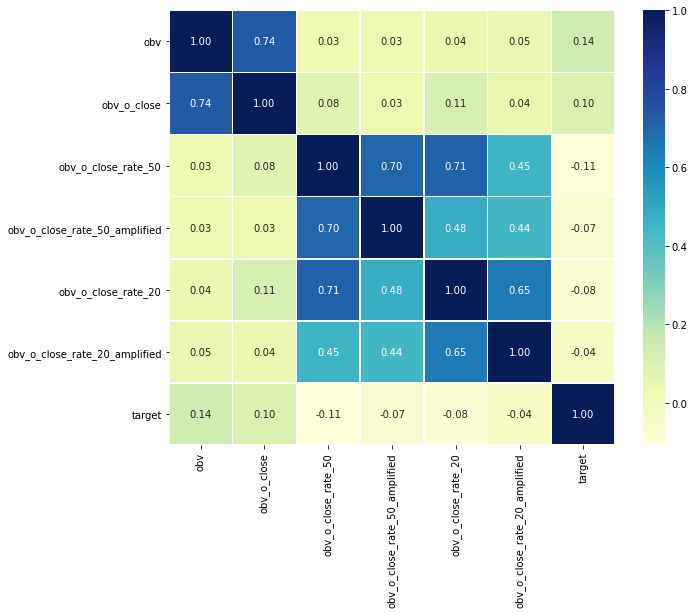

In [13]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

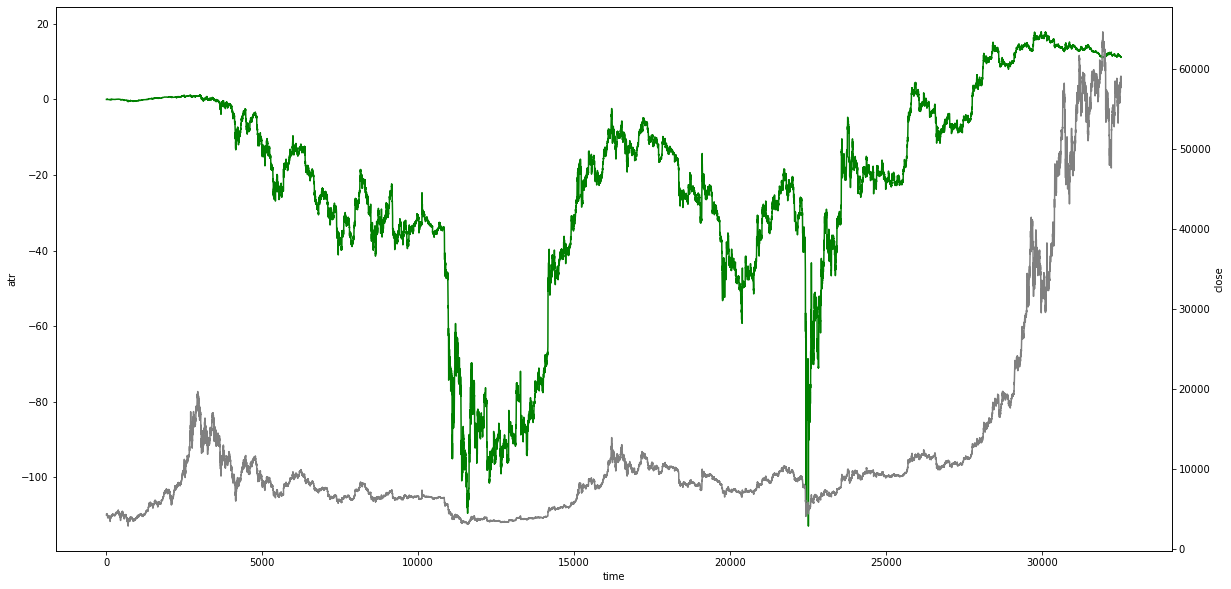

In [14]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.obv_o_close,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()